# Preprocessing data

**Sumber Dataset:** https://www.kaggle.com/jealousleopard/goodreadsbooks

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import data
df = pd.read_csv('books.csv')
#  Tampilkan 5 data pertama
df.head()

,bookID,Title,authors,average_rating,isbn,isbn13,language_code,ratings_count,text_reviews_count,publication_date,Publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,439785960,9.780000e+12,eng,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,439358078,9.780000e+12,eng,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,439554896,9.780000e+12,eng,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9.780000e+12,eng,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,439682584,9.780000e+12,eng,41428,164,9/13/2004,Scholastic


In [2]:
# hapus atribut yang tidak digunakan
df.drop(['bookID', 'Title', 'authors', 'average_rating', 'isbn', 'isbn13', 'language_code', 'publication_date', 'Publisher'], axis=1, inplace=True)

# tampilkan 5 data pertama
df.head()

,ratings_count,text_reviews_count
0,2095690,27591
1,2153167,29221
2,6333,244
3,2339585,36325
4,41428,164


In [3]:
from sklearn.preprocessing import StandardScaler

df_scale = df[['ratings_count', 'text_reviews_count']]

# instantiating the scaler
scaler = StandardScaler()

# fit and transform
df_scale = scaler.fit_transform(df_scale)
df_scale.shape

(278, 2)

In [4]:
df_scale[:3]

array([[ 7.81074286,  7.20927615],
       [ 8.03004685,  7.65245333],
       [-0.16121667, -0.22604051]])

In [5]:
data = pd.DataFrame(df_scale)
data.columns = ['ratings_count', 'text_reviews_count']

data_cluster = data.copy()
data.head()

,ratings_count,text_reviews_count
0,7.810743,7.209276
1,8.030047,7.652453
2,-0.161217,-0.226041
3,8.741326,9.583945
4,-0.027311,-0.247792


In [6]:
data.describe()

,ratings_count,text_reviews_count
count,278.000000,2.780000e+02
mean,0.000000,3.833864e-17
std,1.001803,1.001803e+00
min,-0.185380,-2.923811e-01
25%,-0.184736,-2.888466e-01
50%,-0.179184,-2.649205e-01
75%,-0.150270,-1.588842e-01
max,8.741326,9.583945e+00


# K-means Clustering

Text(0, 0.5, 'Inertia')

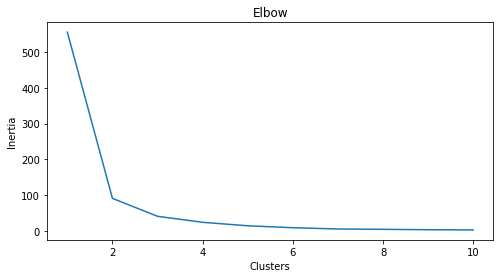

In [7]:
# Menentukan jumlah K
from sklearn.cluster import KMeans

# buat list inertia
clusters = []
for i in range (1,11):
    km = KMeans(n_clusters=i).fit(data)
    clusters.append(km.inertia_)

# tampilkan plot
fig, ax = plt.subplots(figsize=(8,4))
sns.lineplot(x=list(range(1,11)), y=clusters, ax=ax)
ax.set_title('Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

In [8]:
## Melatih model
# Create Model
model_kmeans2 = KMeans(n_clusters=2)
model_kmeans3 = KMeans(n_clusters=3)

# Train Model
model_kmeans2.fit(data)
model_kmeans3.fit(data)

# Menambah Label pada data
data_cluster['cluster_kmeans2'] = model_kmeans2.labels_
data_cluster['cluster_kmeans3'] = model_kmeans3.labels_

data_cluster

,ratings_count,text_reviews_count,cluster_kmeans2,cluster_kmeans3
0,7.810743,7.209276,0,1
1,8.030047,7.652453,0,1
2,-0.161217,-0.226041,1,0
3,8.741326,9.583945,0,1
4,-0.027311,-0.247792,1,0
...,...,...,...,...
273,0.085681,0.459933,1,0
274,-0.167329,-0.218971,1,0
275,-0.179401,-0.274708,1,0
276,0.532317,1.505341,1,2


c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


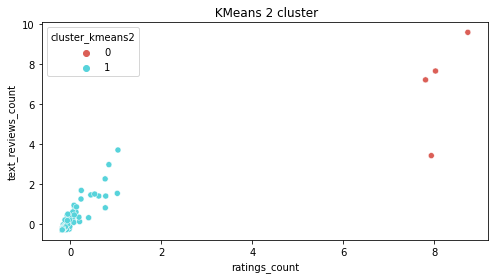

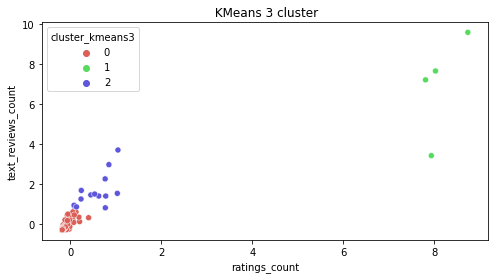

In [9]:
## Tampilkan Plot
plt.figure(figsize=(8,4))
sns.scatterplot(data_cluster['ratings_count'], data_cluster['text_reviews_count'], hue=data_cluster['cluster_kmeans2'], palette=sns.color_palette('hls',2))
plt.title(' KMeans 2 cluster')

plt.figure(figsize=(8,4))
sns.scatterplot(data_cluster['ratings_count'], data_cluster['text_reviews_count'], hue=data_cluster['cluster_kmeans3'], palette=sns.color_palette('hls',3))
plt.title(' KMeans 3 cluster')
plt.show()

# Hierarchial Based Clustering

In [10]:
data

,ratings_count,text_reviews_count
0,7.810743,7.209276
1,8.030047,7.652453
2,-0.161217,-0.226041
3,8.741326,9.583945
4,-0.027311,-0.247792
...,...,...
273,0.085681,0.459933
274,-0.167329,-0.218971
275,-0.179401,-0.274708
276,0.532317,1.505341


In [11]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

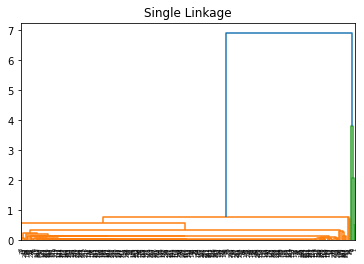

In [12]:
# single linkage
mergings_single = linkage(data, method="single", metric='euclidean')
dendrogram(mergings_single)
plt.title("Single Linkage")
plt.show()

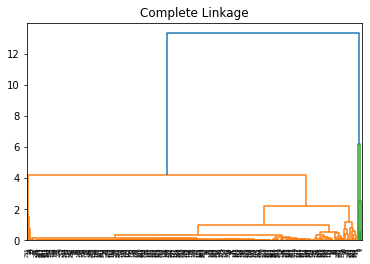

In [13]:
# complete linkage
mergings_complete = linkage(data, method="complete", metric='euclidean')
dendrogram(mergings_complete)
plt.title("Complete Linkage")
plt.show()

In [14]:
# 3 clusters
cluster_hierarchy = cut_tree(mergings_complete, n_clusters=3).reshape(-1, )
cluster_hierarchy

array([0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [15]:
# assign cluster labels
data_cluster['cluster_hierarchy'] = cluster_hierarchy
data_cluster

,ratings_count,text_reviews_count,cluster_kmeans2,cluster_kmeans3,cluster_hierarchy
0,7.810743,7.209276,0,1,0
1,8.030047,7.652453,0,1,0
2,-0.161217,-0.226041,1,0,1
3,8.741326,9.583945,0,1,0
4,-0.027311,-0.247792,1,0,1
...,...,...,...,...,...
273,0.085681,0.459933,1,0,1
274,-0.167329,-0.218971,1,0,1
275,-0.179401,-0.274708,1,0,1
276,0.532317,1.505341,1,2,1


c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, ' Hierarchical Clustering')

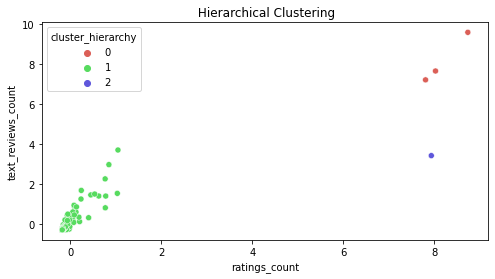

In [16]:
## Tampilkan Plot
plt.figure(figsize=(8,4))
sns.scatterplot(data_cluster['ratings_count'], data_cluster['text_reviews_count'], hue=data_cluster['cluster_hierarchy'], palette=sns.color_palette('hls',3))
plt.title(' Hierarchical Clustering')

# Density Based Clustering

In [17]:
from sklearn.cluster import DBSCAN

In [18]:
data

,ratings_count,text_reviews_count
0,7.810743,7.209276
1,8.030047,7.652453
2,-0.161217,-0.226041
3,8.741326,9.583945
4,-0.027311,-0.247792
...,...,...
273,0.085681,0.459933
274,-0.167329,-0.218971
275,-0.179401,-0.274708
276,0.532317,1.505341


In [25]:
# create an object
db = DBSCAN(eps=0.7, min_samples=5, metric='euclidean')

# fit the model
db.fit(data)

DBSCAN(eps=0.7)

In [26]:
# assign cluster labels
data_cluster['cluster_dbscan'] = db.labels_
data_cluster

,ratings_count,text_reviews_count,cluster_kmeans2,cluster_kmeans3,cluster_hierarchy,cluster_dbscan
0,7.810743,7.209276,0,1,0,-1
1,8.030047,7.652453,0,1,0,-1
2,-0.161217,-0.226041,1,0,1,0
3,8.741326,9.583945,0,1,0,-1
4,-0.027311,-0.247792,1,0,1,0
...,...,...,...,...,...,...
273,0.085681,0.459933,1,0,1,0
274,-0.167329,-0.218971,1,0,1,0
275,-0.179401,-0.274708,1,0,1,0
276,0.532317,1.505341,1,2,1,0


In [27]:
data_cluster.describe()

,ratings_count,text_reviews_count,cluster_kmeans2,cluster_kmeans3,cluster_hierarchy,cluster_dbscan
count,278.000000,2.780000e+02,278.000000,278.000000,278.000000,278.000000
mean,0.000000,3.833864e-17,0.985612,0.115108,0.992806,-0.025180
std,1.001803,1.001803e+00,0.119301,0.450898,0.119952,0.156954
min,-0.185380,-2.923811e-01,0.000000,0.000000,0.000000,-1.000000
25%,-0.184736,-2.888466e-01,1.000000,0.000000,1.000000,0.000000
50%,-0.179184,-2.649205e-01,1.000000,0.000000,1.000000,0.000000
75%,-0.150270,-1.588842e-01,1.000000,0.000000,1.000000,0.000000
max,8.741326,9.583945e+00,1.000000,2.000000,2.000000,0.000000


c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, ' DBSCAN clustering')

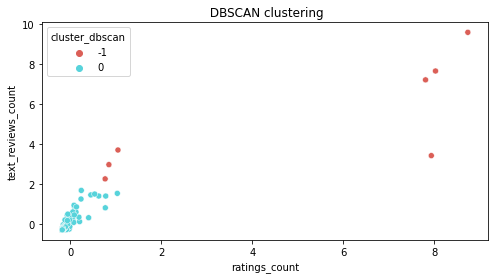

In [29]:
## Tampilkan Plot
plt.figure(figsize=(8,4))
sns.scatterplot(data_cluster['ratings_count'], data_cluster['text_reviews_count'], hue=data_cluster['cluster_dbscan'], palette=sns.color_palette('hls',2))
plt.title(' DBSCAN clustering')